In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import json
from cycler import cycler

In [12]:
files = glob.glob('../data/transactions/collect_transactions*.json')+\
    glob.glob('../data/transactions/tmp/collect_transactions*.json')

def read(f):
    j = pd.read_json(f)
    if len(j) == 0:
        return pd.DataFrame()
    return j.set_index('id') \
        [['level', 'timestamp', 'sender', 'gasLimit', 'gasUsed', 'storageLimit', 'storageUsed', 'bakerFee', 'storageFee', 'allocationFee', 'amount', 'parameter', 'status' ]]

tr = pd.concat(map(read, files))

# This contract doesn't have creator / royalties, and is_primary won't work
#../data/transactions/swap_transactions_KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9_90000-100000.json')

def get_address(j):
    return j['address']

def get_swap_id(j):
    return j['value']['swap_id'] if 'swap_id' in j['value'] else j['value']

def get_objkt_amt(d):
    return d['value']['objkt_amt']

def get_tez(d):
    return d / 10**6

tr['sender'] = tr['sender'].apply(get_address)
tr['swap_id'] = tr['parameter'].apply(get_swap_id)
tr['H=N'] = tr['amount'].apply(get_tez)
tr.head()

,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,swap_id,H=N
id,,,,,,,,,,,,,,,
58603121,1546298,2021-07-07 04:05:18+00:00,tz1Y1j7FK1X9Rrv2VdPz5bXoU7SszF8W1RnK,88446,56363,0,0,9154,0,0,15000000,"{'entrypoint': 'collect', 'value': '500016'}",applied,500016,15.0
58603571,1546305,2021-07-07 04:12:18+00:00,tz1Y1j7FK1X9Rrv2VdPz5bXoU7SszF8W1RnK,88446,56363,310,0,9153,0,0,10000000,"{'entrypoint': 'collect', 'value': '500019'}",applied,500019,10.0
58607218,1546363,2021-07-07 05:10:18+00:00,tz1XEJFTcKBmQrQHgAEsQ4UUWfk1FMnG5SeA,87417,56363,640,0,9049,0,0,1000000,"{'entrypoint': 'collect', 'value': '500045'}",applied,500045,1.0
58607255,1546364,2021-07-07 05:11:18+00:00,tz1KgTRWWqutpmCn3NJePZfpiCpw2QntHGFK,87417,56363,310,0,9050,0,0,3000000,"{'entrypoint': 'collect', 'value': '500044'}",applied,500044,3.0
58607302,1546365,2021-07-07 05:12:18+00:00,tz1bGYiDKFwR4EAgF77LQtek1t9mMqazSyLb,87417,56363,310,0,9050,0,0,3000000,"{'entrypoint': 'collect', 'value': '500044'}",applied,500044,3.0


In [13]:
tr['amount'].sum() / 10**6

8809253.510569

In [14]:
volume = tr.groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).sum()['H=N']
volume

timestamp
2021-03-01 00:00:00+00:00      498.500030
2021-03-02 00:00:00+00:00     1186.000000
2021-03-03 00:00:00+00:00     2318.234817
2021-03-04 00:00:00+00:00     1271.080510
2021-03-05 00:00:00+00:00     2958.712417
                                 ...     
2021-10-14 00:00:00+00:00    49372.845166
2021-10-15 00:00:00+00:00    82024.390703
2021-10-16 00:00:00+00:00    39111.461445
2021-10-17 00:00:00+00:00    36075.165814
2021-10-18 00:00:00+00:00    20471.135105
Freq: D, Name: H=N, Length: 232, dtype: float64

In [15]:
files = glob.glob('../data/transactions/ask_transactions*.json')+\
    glob.glob('../data/transactions/tmp/ask_transactions*.json')

def read(f):
    return pd.read_json(f) \
        .set_index('id') \
        [['level', 'timestamp', 'sender', 'gasLimit', 'gasUsed', 'storageLimit', 'storageUsed', 'bakerFee', 'storageFee', 'allocationFee', 'amount', 'parameter', 'status' ]]

tr = pd.concat(map(read, files))

# This contract doesn't have creator / royalties, and is_primary won't work
#../data/transactions/swap_transactions_KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9_90000-100000.json')

def get_address(j):
    return j['address']

def get_entrypoint(d):
    return d['entrypoint']

def get_tez(d):
    return d / 10**6

def get_value(d):
    return d['value']

tr['sender'] = tr['sender'].apply(get_address)
tr['entrypoint'] = tr['parameter'].apply(get_entrypoint)
tr['value'] = tr['parameter'].apply(get_value)
tr['objkt_com'] = tr['amount'].apply(get_tez)
display(tr.tail())

objkt_volume = tr.groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).sum()['objkt_com']
objkt_volume

,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,entrypoint,value,objkt_com
id,,,,,,,,,,,,,,,,
96915738,1787695,2021-10-18 14:00:44+00:00,tz1XjbEZZU13QPWnpPYQvSvf691TDcF7YQx4,22720,12266,310,0,2584,0,0,3000000,"{'entrypoint': 'fulfill_ask', 'value': '44280'}",applied,fulfill_ask,44280,3.0
96923206,1787722,2021-10-18 14:14:14+00:00,tz2S8xbSkYZ2pnFhiRvC2cVapErz75rNfkWo,22700,12266,310,0,2557,0,0,5000000,"{'entrypoint': 'fulfill_ask', 'value': '47506'}",applied,fulfill_ask,47506,5.0
96943693,1787790,2021-10-18 14:48:14+00:00,tz1chg2T1s4DTjLqthPc49HDcqkFHMwdSPwb,28869,12287,310,0,3200,0,0,440000000,"{'entrypoint': 'fulfill_ask', 'value': '62810'}",applied,fulfill_ask,62810,440.0
96945924,1787799,2021-10-18 14:52:44+00:00,tz1ScePe2eXYo1RBdEe12hNY8KrvHyjFhHw6,23417,12241,310,0,2654,0,0,150000000,"{'entrypoint': 'fulfill_ask', 'value': '62760'}",applied,fulfill_ask,62760,150.0
96947310,1787804,2021-10-18 14:55:14+00:00,tz1TtjhTFHdBo6mbrwqB2FamMQ2bxGDAXErT,22784,12350,310,0,2566,0,0,4000000,"{'entrypoint': 'fulfill_ask', 'value': '56741'}",applied,fulfill_ask,56741,4.0


timestamp
2021-07-01 00:00:00+00:00     591.95690
2021-07-02 00:00:00+00:00    2398.51300
2021-07-03 00:00:00+00:00    3111.01000
2021-07-04 00:00:00+00:00    1707.08000
2021-07-05 00:00:00+00:00    3600.92300
                                ...    
2021-10-14 00:00:00+00:00    8959.39560
2021-10-15 00:00:00+00:00    8286.65769
2021-10-16 00:00:00+00:00    4282.92040
2021-10-17 00:00:00+00:00    5434.48700
2021-10-18 00:00:00+00:00    8389.87700
Freq: D, Name: objkt_com, Length: 110, dtype: float64

In [16]:
# english_auction / conclude_auction - indicates sale
# bigmap_keys_5910 - has objkt_id and price

files = glob.glob('../data/transactions/bid_transactions*.json')+\
    glob.glob('../data/transactions/tmp/bid_transactions*.json')
display(files)

def read(f):
    return pd.read_json(f) \
        .set_index('id') \
        [['level', 'timestamp', 'sender', 'gasLimit', 'gasUsed', 'storageLimit', 'storageUsed', 'bakerFee', 'storageFee', 'allocationFee', 'amount', 'parameter', 'status' ]]

tr = pd.concat(map(read, files))

# This contract doesn't have creator / royalties, and is_primary won't work
#../data/transactions/swap_transactions_KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9_90000-100000.json')

def get_address(j):
    return j['address']

def get_entrypoint(d):
    return d['entrypoint']

def get_value(d):
    return d['value']

tr['sender'] = tr['sender'].apply(get_address)
tr['entrypoint'] = tr['parameter'].apply(get_entrypoint)
# this is the bid key from bigmap 5910
tr['key'] = tr['parameter'].apply(get_value).astype('int64')
display(tr.tail())


['../data/transactions/tmp\\bid_transactions_KT1FvqJwEDWb1Gwc55Jd1jjTHRVWbYKUUpyq_0-6007.json']

,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,entrypoint,key
id,,,,,,,,,,,,,,,
96930228,1787745,2021-10-18 14:25:44+00:00,tz1TuV6EWSNzza2d66bCCQPABQFMgUscvKJh,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '18909'}",applied,fulfill_bid,18909
96941898,1787785,2021-10-18 14:45:44+00:00,tz1fkQKEcPo19jzrcy3Bgm3qHiLkWde1EPSx,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20002'}",applied,fulfill_bid,20002
96945374,1787798,2021-10-18 14:52:14+00:00,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20101'}",applied,fulfill_bid,20101
96945754,1787799,2021-10-18 14:52:44+00:00,tz1ME3HTVzFvk9bRpqT9sMS1avJ2RaM3EkXX,24005,14967,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20277'}",applied,fulfill_bid,20277
96946786,1787803,2021-10-18 14:54:44+00:00,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20156'}",applied,fulfill_bid,20156


In [17]:
files = glob.glob('../data/transactions/bigmap_keys_5910_*.json')+\
    glob.glob('../data/transactions/tmp/bigmap_keys_5910_*.json')

def read(f):
    return pd.read_json(f) \
        [['key', 'value']]

def get_tez(d):
    return int(d['xtz_per_objkt']) / 10**6

def get_artist(d):
    return d['artist']

def get_objkt_id(d):
    return d['objkt_id']

bm = pd.concat(map(read, files))
bm['artist'] = bm['value'].apply(get_artist)
bm['objkt_id'] = bm['value'].apply(get_artist)
bm['xtz_per_objkt'] = bm['value'].apply(get_tez)

#display(bm.tail())
#display(tr.tail())
merged = tr.merge(bm, how='left', on='key')
display(merged.tail())

bid_volume = merged.groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).sum()['xtz_per_objkt']
display(bid_volume)
display(objkt_volume)

# As a sanity check, merged (fulfilled) should be smaller than bm (all bids)
display(bm['xtz_per_objkt'].sum())
display(merged['xtz_per_objkt'].sum())

objkt = bid_volume.add(objkt_volume).rename('objkt_com')
display(objkt)

,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,entrypoint,key,value,artist,objkt_id,xtz_per_objkt
6002,1787745,2021-10-18 14:25:44+00:00,tz1TuV6EWSNzza2d66bCCQPABQFMgUscvKJh,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '18909'}",applied,fulfill_bid,18909,{'fa2': 'KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton'...,tz1RNDoqLh5VCqBUXrgmzhwxqcR7ptAfvfNh,tz1RNDoqLh5VCqBUXrgmzhwxqcR7ptAfvfNh,100.0
6003,1787785,2021-10-18 14:45:44+00:00,tz1fkQKEcPo19jzrcy3Bgm3qHiLkWde1EPSx,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20002'}",applied,fulfill_bid,20002,{'fa2': 'KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton'...,tz1X4Ki4K5EqVLZ3KfMYggqSNYaeTFoK15gc,tz1X4Ki4K5EqVLZ3KfMYggqSNYaeTFoK15gc,4.0
6004,1787798,2021-10-18 14:52:14+00:00,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20101'}",applied,fulfill_bid,20101,{'fa2': 'KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton'...,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,2.0
6005,1787799,2021-10-18 14:52:44+00:00,tz1ME3HTVzFvk9bRpqT9sMS1avJ2RaM3EkXX,24005,14967,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20277'}",applied,fulfill_bid,20277,{'fa2': 'KT1SyPgtiXTaEfBuMZKviWGNHqVrBBEjvtfQ'...,tz1KsfxrzzVraeNxBi6GiZV3MQ4WfUdoY5gE,tz1KsfxrzzVraeNxBi6GiZV3MQ4WfUdoY5gE,0.1
6006,1787803,2021-10-18 14:54:44+00:00,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,25726,15012,310,0,0,0,0,0,"{'entrypoint': 'fulfill_bid', 'value': '20156'}",applied,fulfill_bid,20156,{'fa2': 'KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton'...,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,tz1Rb8qvYAdF4r2iiYXbukYvbuyHrDwG1f3x,3.0


timestamp
2021-07-01 00:00:00+00:00     169.820000
2021-07-02 00:00:00+00:00    1161.610000
2021-07-03 00:00:00+00:00     741.747900
2021-07-04 00:00:00+00:00     267.590998
2021-07-05 00:00:00+00:00     506.020000
                                ...     
2021-10-14 00:00:00+00:00    2052.849999
2021-10-15 00:00:00+00:00    4418.030000
2021-10-16 00:00:00+00:00    2317.382000
2021-10-17 00:00:00+00:00    2425.164998
2021-10-18 00:00:00+00:00    2174.682000
Freq: D, Name: xtz_per_objkt, Length: 110, dtype: float64

timestamp
2021-07-01 00:00:00+00:00     591.95690
2021-07-02 00:00:00+00:00    2398.51300
2021-07-03 00:00:00+00:00    3111.01000
2021-07-04 00:00:00+00:00    1707.08000
2021-07-05 00:00:00+00:00    3600.92300
                                ...    
2021-10-14 00:00:00+00:00    8959.39560
2021-10-15 00:00:00+00:00    8286.65769
2021-10-16 00:00:00+00:00    4282.92040
2021-10-17 00:00:00+00:00    5434.48700
2021-10-18 00:00:00+00:00    8389.87700
Freq: D, Name: objkt_com, Length: 110, dtype: float64

1704744.338114

310387.61412000004

timestamp
2021-07-01 00:00:00+00:00      761.776900
2021-07-02 00:00:00+00:00     3560.123000
2021-07-03 00:00:00+00:00     3852.757900
2021-07-04 00:00:00+00:00     1974.670998
2021-07-05 00:00:00+00:00     4106.943000
                                 ...     
2021-10-14 00:00:00+00:00    11012.245599
2021-10-15 00:00:00+00:00    12704.687690
2021-10-16 00:00:00+00:00     6600.302400
2021-10-17 00:00:00+00:00     7859.651998
2021-10-18 00:00:00+00:00    10564.559000
Freq: D, Name: objkt_com, Length: 110, dtype: float64

C:\Users\tim\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


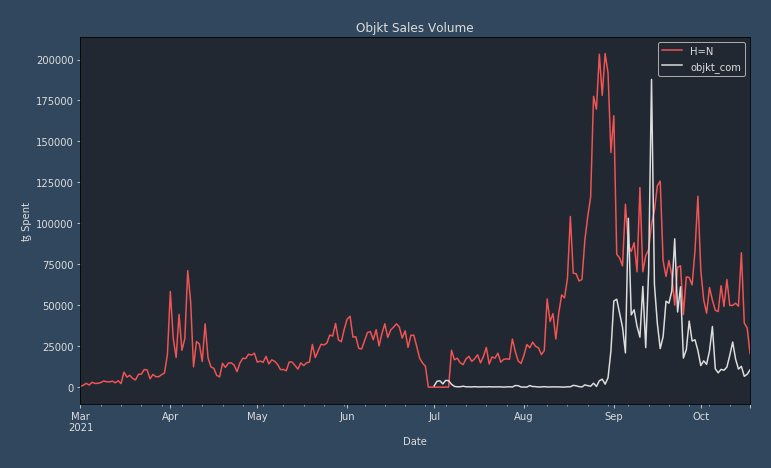

In [18]:
c1 = '#222831'
c2 = '#30475E'
c3 = '#F05454'
c4 = '#DDDDDD'

plt.rcParams.update({
    "figure.facecolor":  c2,
    "axes.facecolor":    c1,
    "text.color": c4,
    "axes.labelcolor": c4,
    "xtick.color":  c4,
    "ytick.color":  c4,
    "grid.color":  c4,
    "savefig.pad_inches": 0.3,
})

color_cycler = cycler('color', [c3, c4])
plt.rc('axes', prop_cycle=color_cycler)

volume.plot(figsize=(12,6.75))
objkt.plot(figsize=(12,6.75))

plt.xlabel('Date')
plt.ylabel(f'ꜩ Spent')
plt.legend()
_ = plt.title(f'Objkt Sales Volume')

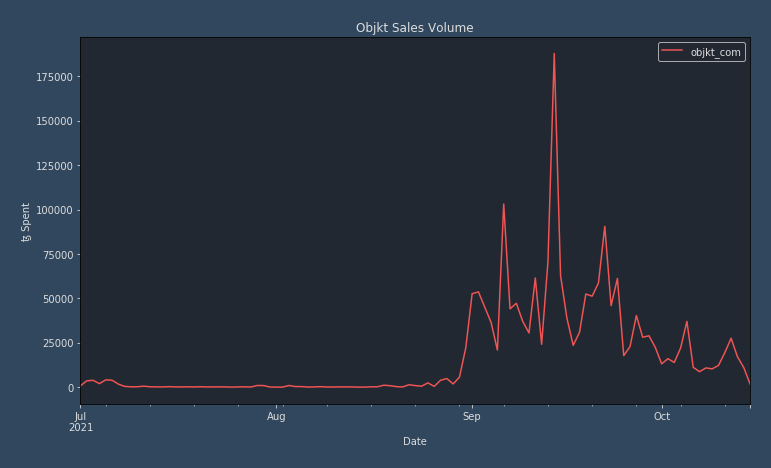

In [114]:
c1 = '#222831'
c2 = '#30475E'
c3 = '#F05454'
c4 = '#DDDDDD'

plt.rcParams.update({
    "figure.facecolor":  c2,
    "axes.facecolor":    c1,
    "text.color": c4,
    "axes.labelcolor": c4,
    "xtick.color":  c4,
    "ytick.color":  c4,
    "grid.color":  c4,
    "savefig.pad_inches": 0.3,
})

color_cycler = cycler('color', [c3, c4])
plt.rc('axes', prop_cycle=color_cycler)

#bid_volume.plot(figsize=(12,6.75))
objkt.plot(figsize=(12,6.75))

plt.xlabel('Date')
plt.ylabel(f'ꜩ Spent')
plt.legend()
_ = plt.title(f'Objkt Sales Volume')

In [115]:
objkt.sum()

1798742.9931969997